In [1]:
# Ensure we don't generate large images for inline docs
# You probably want to remove this if running the notebook yourself
import matplotlib
matplotlib.rcParams["figure.dpi"] = 72

import datamapplot
import numpy as np
import pandas as pd


In [2]:
# Replace 'file.npy' with the path to your .npy file
arxivml_data_map = np.load('biden.npy')
arxivml_labels = np.load('biden_context_data.npy', allow_pickle = True)

dataset = pd.read_csv('biden_topic_labelled.csv')

In [3]:
dataset

,Topic,Count,Name,Representation,Representative_Docs,Human_Readable_Topic,Domain_Name
0,-1,478,-1_joe_the_biden_to,"['joe', 'the', 'biden', 'to', 'president', 'on...",['A post shared on Facebook claims Facebook re...,Label: OUTLIERS\nTopic Domain: Politics,NaN
1,0,89,0_shows_photograph_image_on,"['shows', 'photograph', 'image', 'on', 'with',...",['An image shared on Facebook allegedly shows ...,Label: Misleading Depictions of President Joe ...,NaN
2,1,88,1_gas_prices_pipeline_oil,"['gas', 'prices', 'pipeline', 'oil', 'keystone...",['A gas prices meme accurately shows high pric...,Label: Biden's Keystone Pipeline Decision and ...,NaN
3,2,80,2_donald_2020_joe_presidential,"['donald', '2020', 'joe', 'presidential', 'tru...",['Democratic 2020 presidential nominee Joe Bid...,Label: Joe Biden's Statements about Donald Tru...,NaN
4,3,76,3_votes_ballots_election_in,"['votes', 'ballots', 'election', 'in', '2020',...","['A post on Twitter claims 6,000 fraudulent vo...",Label: 2020 Election Voting Discrepancies \nTo...,NaN
5,4,73,4_hunter_son_laptop_pelosi,"['hunter', 'son', 'laptop', 'pelosi', 'militar...",['A video shared on Facebook claims Republican...,"Label: ""Fact-checking Hunter Biden Claims on S...",NaN
6,5,70,5_covid19_vaccine_vaccines_vaccinated,"['covid19', 'vaccine', 'vaccines', 'vaccinated...",['An image shared on Facebook claims President...,"Label: ""Fact-check on Joe Biden's Statements a...",NaN
7,6,70,6_video_shows_speech_joe,"['video', 'shows', 'speech', 'joe', 'biden', '...",['A video shared on Facebook purportedly shows...,Label: Joe Biden's Speeches and Actions in Sha...,NaN
8,7,57,7_harris_kamala_vice_president,"['harris', 'kamala', 'vice', 'president', 'res...",['Vice presidential candidate Kamala Harris sa...,Label: Misinformation Regarding Kamala Harris'...,NaN
9,8,52,8_border_administration_illegal_the,"['border', 'administration', 'illegal', 'the',...",['The Biden Administration is recklessly relea...,Label: Biden Administration's Border Policy an...,NaN


In [4]:
import pandas as pd
import re

# Define the regex pattern to extract Label and Topic Domain
pattern = r"Label: (?P<Label>.+)\nTopic Domain: (?P<Topic_Domain>.+)"

# Apply the regex to the 'Human_Readable_Topic' column
extracted_data = dataset['Human_Readable_Topic'].str.extract(pattern)

# Add the 'Label' and 'Topic Domain' columns to the existing 'dataset' DataFrame
dataset['Label'] = extracted_data['Label']
dataset['Topic_Domain'] = extracted_data['Topic_Domain']

# Remove quotation marks from the 'Label' column
dataset['Label'] = dataset['Label'].str.replace('"', '')
dataset

,Topic,Count,Name,Representation,Representative_Docs,Human_Readable_Topic,Domain_Name,Label,Topic_Domain
0,-1,478,-1_joe_the_biden_to,"['joe', 'the', 'biden', 'to', 'president', 'on...",['A post shared on Facebook claims Facebook re...,Label: OUTLIERS\nTopic Domain: Politics,NaN,OUTLIERS,Politics
1,0,89,0_shows_photograph_image_on,"['shows', 'photograph', 'image', 'on', 'with',...",['An image shared on Facebook allegedly shows ...,Label: Misleading Depictions of President Joe ...,NaN,Misleading Depictions of President Joe Biden,Politics/Social Media Misinformation
2,1,88,1_gas_prices_pipeline_oil,"['gas', 'prices', 'pipeline', 'oil', 'keystone...",['A gas prices meme accurately shows high pric...,Label: Biden's Keystone Pipeline Decision and ...,NaN,Biden's Keystone Pipeline Decision and Impact ...,Energy Politics
3,2,80,2_donald_2020_joe_presidential,"['donald', '2020', 'joe', 'presidential', 'tru...",['Democratic 2020 presidential nominee Joe Bid...,Label: Joe Biden's Statements about Donald Tru...,NaN,Joe Biden's Statements about Donald Trump Duri...,Politics
4,3,76,3_votes_ballots_election_in,"['votes', 'ballots', 'election', 'in', '2020',...","['A post on Twitter claims 6,000 fraudulent vo...",Label: 2020 Election Voting Discrepancies \nTo...,NaN,2020 Election Voting Discrepancies,Politics
5,4,73,4_hunter_son_laptop_pelosi,"['hunter', 'son', 'laptop', 'pelosi', 'militar...",['A video shared on Facebook claims Republican...,"Label: ""Fact-checking Hunter Biden Claims on S...",NaN,Fact-checking Hunter Biden Claims on Social Media,Politics
6,5,70,5_covid19_vaccine_vaccines_vaccinated,"['covid19', 'vaccine', 'vaccines', 'vaccinated...",['An image shared on Facebook claims President...,"Label: ""Fact-check on Joe Biden's Statements a...",NaN,Fact-check on Joe Biden's Statements about COV...,Politics & Public Health
7,6,70,6_video_shows_speech_joe,"['video', 'shows', 'speech', 'joe', 'biden', '...",['A video shared on Facebook purportedly shows...,Label: Joe Biden's Speeches and Actions in Sha...,NaN,Joe Biden's Speeches and Actions in Shared Videos,Politics
8,7,57,7_harris_kamala_vice_president,"['harris', 'kamala', 'vice', 'president', 'res...",['Vice presidential candidate Kamala Harris sa...,Label: Misinformation Regarding Kamala Harris'...,NaN,Misinformation Regarding Kamala Harris's Presi...,Politics
9,8,52,8_border_administration_illegal_the,"['border', 'administration', 'illegal', 'the',...",['The Biden Administration is recklessly relea...,Label: Biden Administration's Border Policy an...,NaN,Biden Administration's Border Policy and COVID-19,Politics & Health Policy


In [5]:
import numpy as np
import pandas as pd

def replace_labels(old_labels_array, mapping_dataframe):
    """
    Replace old labels with new labels based on a mapping DataFrame.

    Parameters:
    old_labels_array (numpy.ndarray): The array of old labels.
    mapping_dataframe (pandas.DataFrame): The DataFrame with the mapping of old to new labels.
                                          It must have columns 'Name' for old labels and 'Label' for new labels.

    Returns:
    numpy.ndarray: A new array with the old labels replaced by new labels.
    """
    
    # Make sure the 'Name' column is of a hashable type (e.g., string)
    mapping_dataframe['Name'] = mapping_dataframe['Name'].astype(str)
    
    # Create a dictionary from the DataFrame for quick label lookup
    label_mapping = dict(zip(mapping_dataframe['Name'], mapping_dataframe['Label']))
    
    # Make sure old_labels_array is an array of hashable types (e.g., strings)
    old_labels_array = old_labels_array.astype(str)
    
    # Replace each old label with the new label using the mapping
    # If a label from the old labels array doesn't exist in the mapping, it will be left as it is.
    new_labels_array = np.array([label_mapping.get(label, label) for label in old_labels_array])
    
    return new_labels_array

# Now we call our function to get the new labels array
new_labels = replace_labels(arxivml_labels, dataset)

In [6]:
import numpy as np
import pandas as pd

def replace_labels(old_labels_array, mapping_dataframe):
    """
    Replace old labels with new labels based on a mapping DataFrame.

    Parameters:
    old_labels_array (numpy.ndarray): The array of old labels.
    mapping_dataframe (pandas.DataFrame): The DataFrame with the mapping of old to new labels.
                                          It must have columns 'Name' for old labels and 'Label' for new labels.

    Returns:
    numpy.ndarray: A new array with the old labels replaced by new labels.
    """
    
    # Make sure the 'Name' column is of a hashable type (e.g., string)
    mapping_dataframe['Name'] = mapping_dataframe['Name'].astype(str)
    
    # Create a dictionary from the DataFrame for quick label lookup
    label_mapping = dict(zip(mapping_dataframe['Name'], mapping_dataframe['Label']))
    
    # Print the mapping dictionary
    print("Label Mapping Dictionary:")
    print(label_mapping)
    
    # Make sure old_labels_array is an array of hashable types (e.g., strings)
    old_labels_array = old_labels_array.astype(str)
    
    # Replace each old label with the new label using the mapping
    new_labels_array = np.array([label_mapping.get(label, label) for label in old_labels_array])
    
    return new_labels_array

new_labels = replace_labels(arxivml_labels, dataset)


Label Mapping Dictionary:
{'-1_joe_the_biden_to': 'OUTLIERS', '0_shows_photograph_image_on': 'Misleading Depictions of President Joe Biden', '1_gas_prices_pipeline_oil': "Biden's Keystone Pipeline Decision and Impact on Gas Prices", '2_donald_2020_joe_presidential': "Joe Biden's Statements about Donald Trump During 2020 Presidential Campaign", '3_votes_ballots_election_in': '2020 Election Voting Discrepancies ', '4_hunter_son_laptop_pelosi': 'Fact-checking Hunter Biden Claims on Social Media', '5_covid19_vaccine_vaccines_vaccinated': "Fact-check on Joe Biden's Statements about COVID-19 and Vaccinations", '6_video_shows_speech_joe': "Joe Biden's Speeches and Actions in Shared Videos", '7_harris_kamala_vice_president': "Misinformation Regarding Kamala Harris's Presidential Position", '8_border_administration_illegal_the': "Biden Administration's Border Policy and COVID-19", '9_tax_taxes_your_raise': "Biden's Proposed Tax Changes ", '10_economy_rights_the_said': "Joe Biden's Stance on Con

(<Figure size 864x864 with 1 Axes>, <Axes: >)

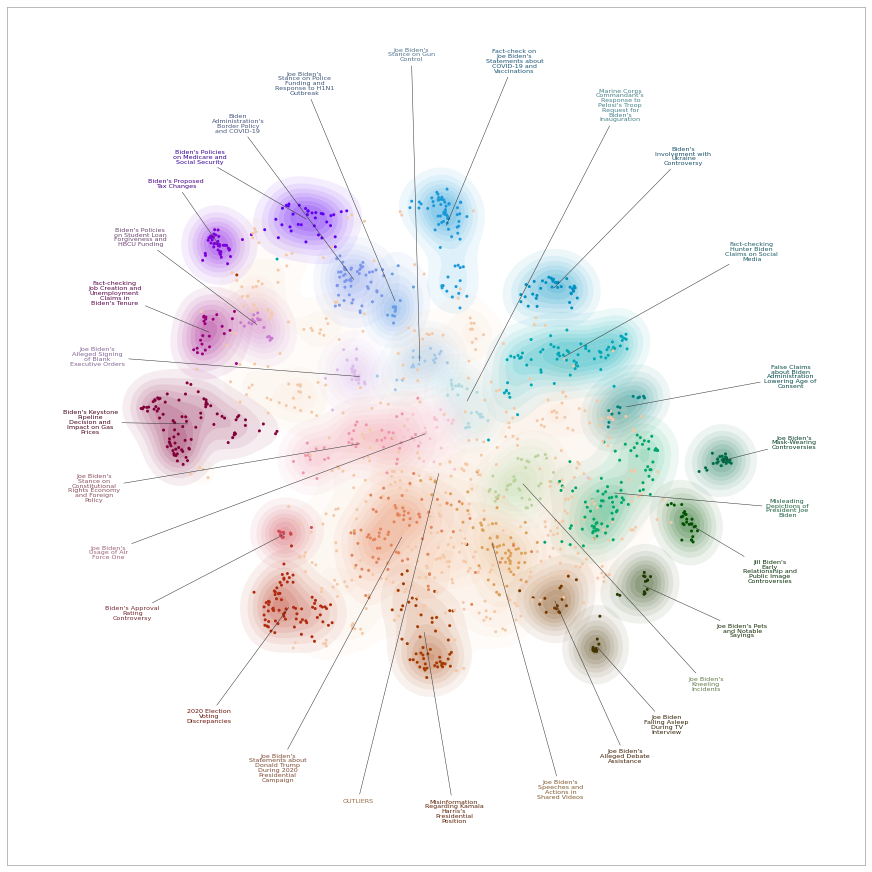

In [7]:
datamapplot.create_plot(arxivml_data_map, new_labels)

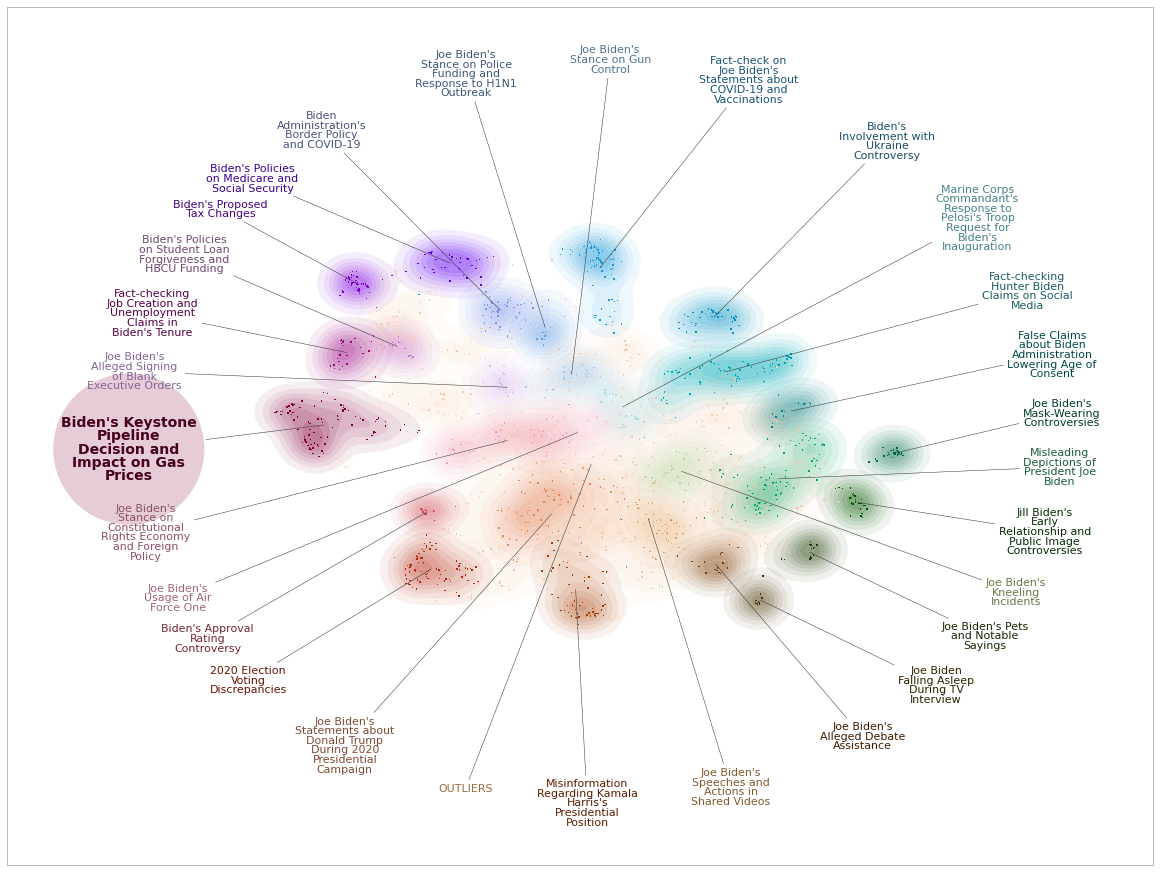

In [7]:
fig, ax = datamapplot.create_plot(
    arxivml_data_map,
    new_labels,
     point_size=2,
    figsize=(16, 12),
    marker_type="s",
    highlight_labels=[
        "Biden's Keystone Pipeline Decision and Impact on Gas Prices",
    ],
    
    label_font_size=11,
    highlight_label_keywords={
        "fontsize": 14, "fontweight": "bold", "bbox":{"boxstyle":"circle", "pad":0.55}
    },
)

In [9]:
fig.savefig("datamapplot-biden-context.png", bbox_inches="tight")

In [11]:
import pandas as pd

label_sizes = pd.Series(new_labels).value_counts()
label_sizes.reset_index()

,index,0
0,OUTLIERS,478
1,Misleading Depictions of President Joe Biden,89
2,Biden's Keystone Pipeline Decision and Impact ...,88
3,Joe Biden's Statements about Donald Trump Duri...,80
4,2020 Election Voting Discrepancies,76
5,Fact-checking Hunter Biden Claims on Social Media,73
6,Fact-check on Joe Biden's Statements about COV...,70
7,Joe Biden's Speeches and Actions in Shared Videos,70
8,Misinformation Regarding Kamala Harris's Presi...,57
9,Biden Administration's Border Policy and COVID-19,52
